## Aaron Blythe & Daniel Barker
Page 1 Distribution graph

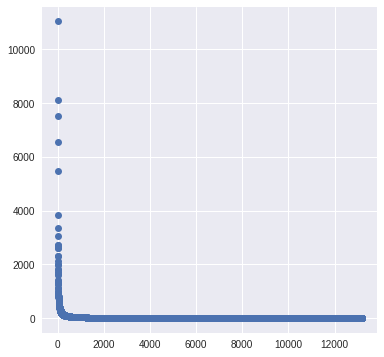

In [0]:
fig = plt.figure(figsize=(6, 6))
p1 = plt.plot(range(0, len(wordseries)), wordseries, linestyle="", marker="o")
plt.show()

\pagebreak

Page 2 Identify the stop words

Frequency threshold is from 5 to 1000.

```
vec_stop = CountVectorizer(stop_words=stop_word, max_df=1000, min_df=5)

```

For stop words we went the route of having a very high number. This worked out for better accuracy. As we are finding that there are a few words that really key in on a positive and negative review.


In [0]:
print(initial_stop_words)

the     11041
and      8107
i        7511
to       6565
a        5491
was      3817
it       3333
of       3040
for      2728
in       2702
my       2606
is       2604
that     2321
they     2295
this     2116
we       2029
you      1962
with     1817
t        1796
on       1719
not      1650
have     1586
but      1409
had      1387
me       1330
dtype: int64


\pagebreak

Page 3 Distribution graph again

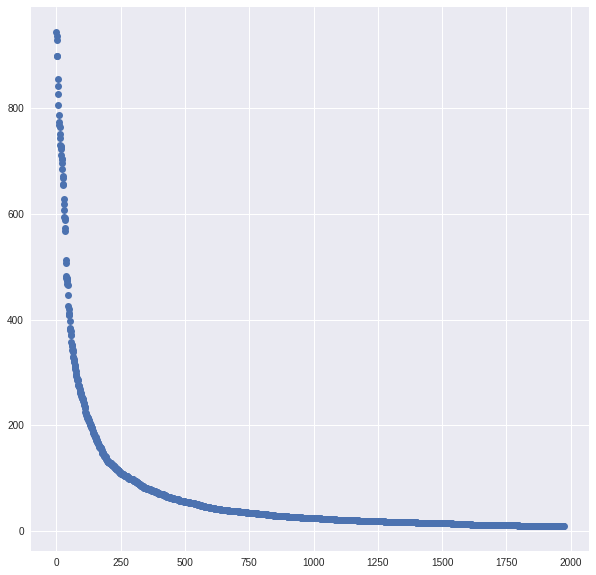

In [0]:
fig = plt.figure(figsize=(10, 10))
p1 = plt.plot(range(0, len(wordseries2)), wordseries2, linestyle="", marker="o")
plt.show()

\pagebreak

Page 4 Code snippets



Bag of words
``` python
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=stop_words)
X = vectorizer.fit(df.text)
words = X.transform(df.text)
wordsdf = pd.DataFrame(words.todense(), columns=X.get_feature_names())
```
Nearest-neighbors with cos-distance

``` python
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='cosine')
knn.fit(wordsdf, df.stars)
search = X.transform(["horrible customer service"])
searchdf = pd.DataFrame(search.todense(), columns=X.get_feature_names())
predicted = knn.predict(searchdf)
print(predicted)
```

\pagebreak

Page 5 Reviews with score



In [0]:
for i in range(len(indexes[0])):
  print("Distance: {}, Review: {}".format(distances[0][i], df.iloc[indexes[0][i]]['text']))

Distance: 0.41074434901121026, Review: Rogers ...

1) is over priced
2) have horrible customer service
3) faulty and incorrect billing
4) poor customer service
5) not enough options
6) never arrive for an appointment
Distance: 0.5269838351203597, Review: Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  He will not repair the issue he caused, and told me to go somewhere else.  

Save yourself the hassle, there are plenty of other quality pool companies out there.  

Take care!
Distance: 0.5470891863421616, Review: Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and will NEVER recommend this place. was treated absolutely horrible. Horrible.
Distance: 0.6150998205402495, Review: Customer service was super bad. The pizza was co

\pagebreak

Page 6 Query results

These were the top 5 results using knn with cosine distance and a custom stop words list. All 5 were chosen, because all five are closely related to reviews about horrible customer service. The first three actually have that phrase included in the review.

In [0]:
for i in indexes:
  print(df.iloc[i]['text'])

1808    Rogers ...\n\n1) is over priced\n2) have horrible customer service\n3) faulty and incorrect billing\n4) poor customer service\n5) not enough options\n6) never arrive for an appointment                                                                                                                                                                                                                                              
90      Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  He will not repair the issue he caused, and told me to go somewhere else.  \n\nSave yourself the hassle, there are plenty of other quality pool companies out there.  \n\nTake care!
729     Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and will

\pagebreak

Page 7 Accuracy with threshold 0.5

``` python
lr = LogisticRegression(solver='lbfgs')
lr.fit(bow_train_df, y_train)
bow_test = X.transform(X_test)
bow_test_df = pd.DataFrame(bow_test.todense(), columns=X.get_feature_names())

train_predictions = lr.predict(bow_train_df)
train_prob = lr.predict_proba(bow_train_df)
train_accuracy = lr.score(bow_train_df, y_train)
print("train accuracy:", train_accuracy)

predictions = lr.predict(bow_test_df)
probabilities = lr.predict_proba(bow_test_df)
test_accuracy = lr.score(bow_test_df, y_test)
print("test accuracy:", test_accuracy)
```


In [0]:
print("train accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

train accuracy: 0.9977777777777778
test accuracy: 0.93


\pagebreak

Page 8 Predicted scores

Only showing positive in the graph based on feedback from: https://piazza.com/class/jqo7mhnnyiy698?cid=935

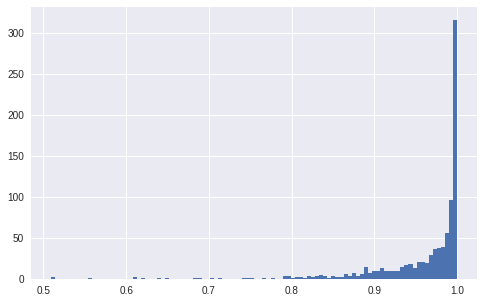

In [75]:
fig = plt.figure(figsize=(8, 5))
neg = [prob[1] for prob in train_prob[train_predictions == 1]]
pos = [prob[1] for prob in train_prob[train_predictions == 5]]
plt.hist(pos, bins=100)
plt.show()

Showing both positive (5 star reviews) and negative (1 star) for completeness.

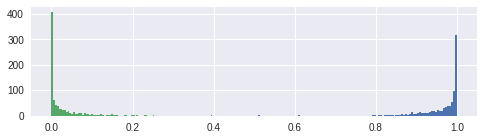

In [0]:
fig = plt.figure(figsize=(8, 2))
plt.hist(pos, bins=100)
plt.hist(neg, bins=100)
plt.show()

Page 9 Accuracy again and curve


In [0]:
print('train accuracy is ', correct/len(predictions))
print('test accuracy is ', test_correct/len(test_predictions))

train accuracy is  0.9983333333333333
test accuracy is  0.96


The threshold of .5 already showed a fairly good probability. We tried numbers ranging from .35 to .65.

the number .61 had the highest accuracy that we observed

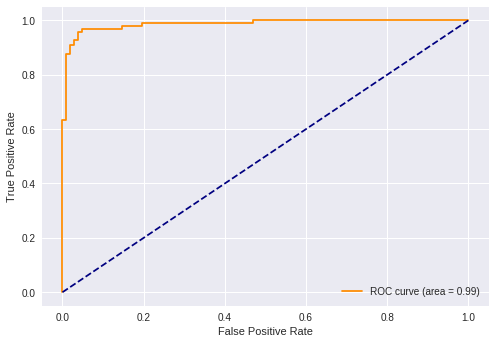

In [0]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % area_uc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

\pagebreak

Page 10 Best threshold

We want to minimize the False Positive Rate and simultaneously to maximize the True Positive Rate. So also want to minimize the 1-(True Positive Rate). We used the Root Sum of Squares and tried to minimize this. This coincided with what we observed in when trying different numbers for page 9.






In [0]:
min_dist = 1000
result = (0,0,0)
for f,t,th in zip(fpr, tpr, threshold):
    dist = np.sqrt(np.square(f) + np.square(1-t))
    if dist < min_dist:
        result = (f, t, th)
        min_dist = dist

print('At the best threshold: ', result[2])
print('The False Positive Rate is: ', result[0])
print('The True Positive Rate is: ', result[1])

At the best threshold:  0.6158873634674278
The False Positive Rate is:  0.0392156862745098
The True Positive Rate is:  0.9591836734693877


\pagebreak

In [0]:
# Start execution here

import pandas as pd
import io, requests
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [0]:
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url = "http://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/yelp_2k.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), usecols=['stars', 'text'])

the     11041
and      8107
i        7511
to       6565
a        5491
was      3817
it       3333
of       3040
for      2728
in       2702
my       2606
is       2604
that     2321
they     2295
this     2116
we       2029
you      1962
with     1817
t        1796
on       1719
not      1650
have     1586
but      1409
had      1387
me       1330
dtype: int64


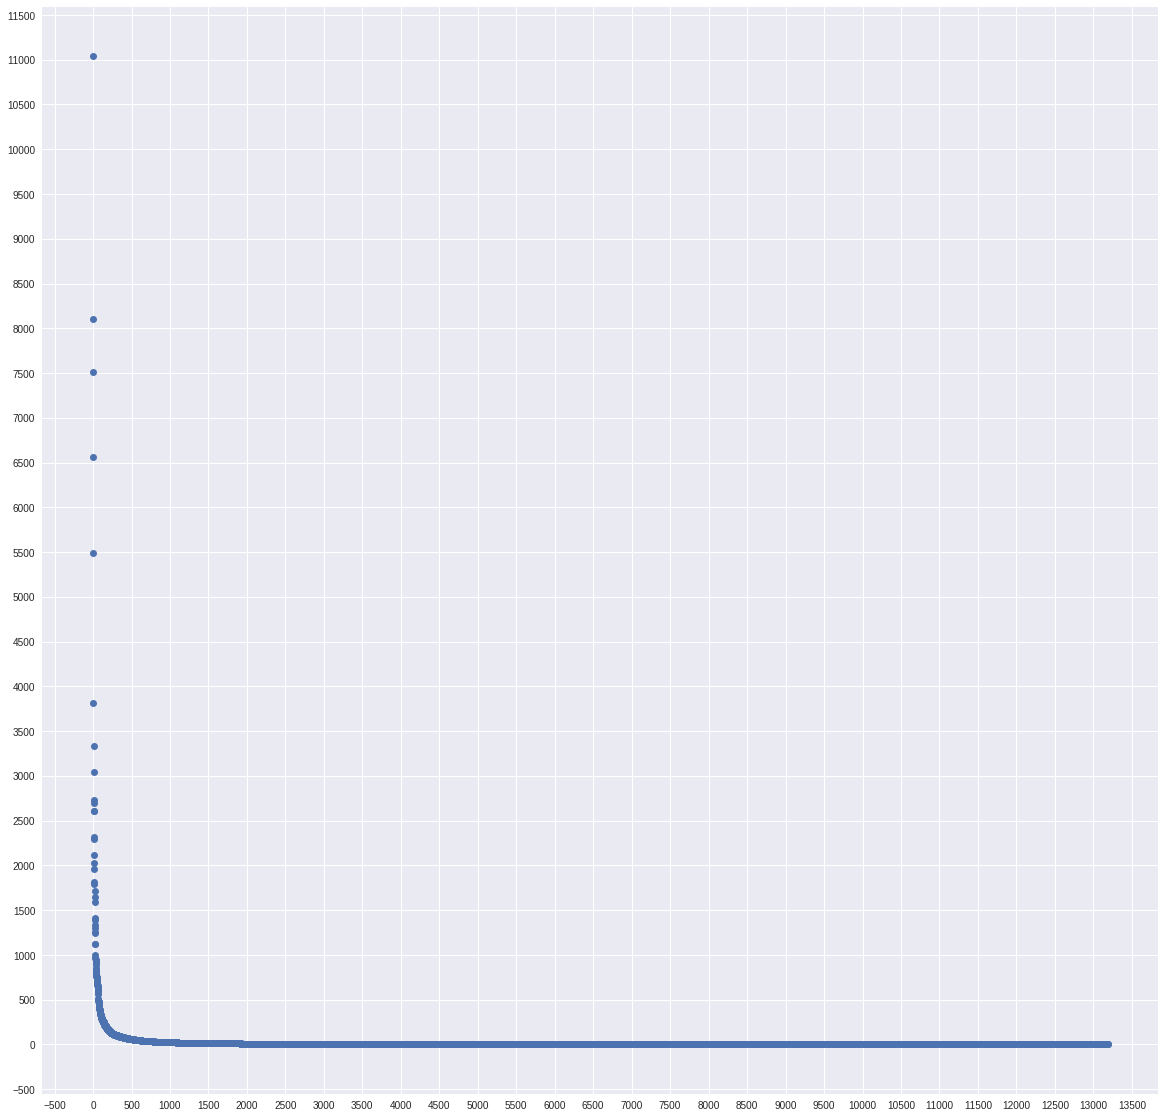

In [0]:
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit(df.text)
words = X.transform(df.text)
wordsdf = pd.DataFrame(words.todense(), columns=X.get_feature_names())
wordseries = wordsdf.sum(axis=0)
wordseries.sort_values(ascending=False, inplace=True)
initial_stop_words = wordseries.head(25)
print(wordseries.head(25))
fig = plt.figure(figsize=(20, 20))
p1 = plt.plot(range(0, len(wordseries)), wordseries, linestyle="", marker="o")
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

False
False
False
11212
1974


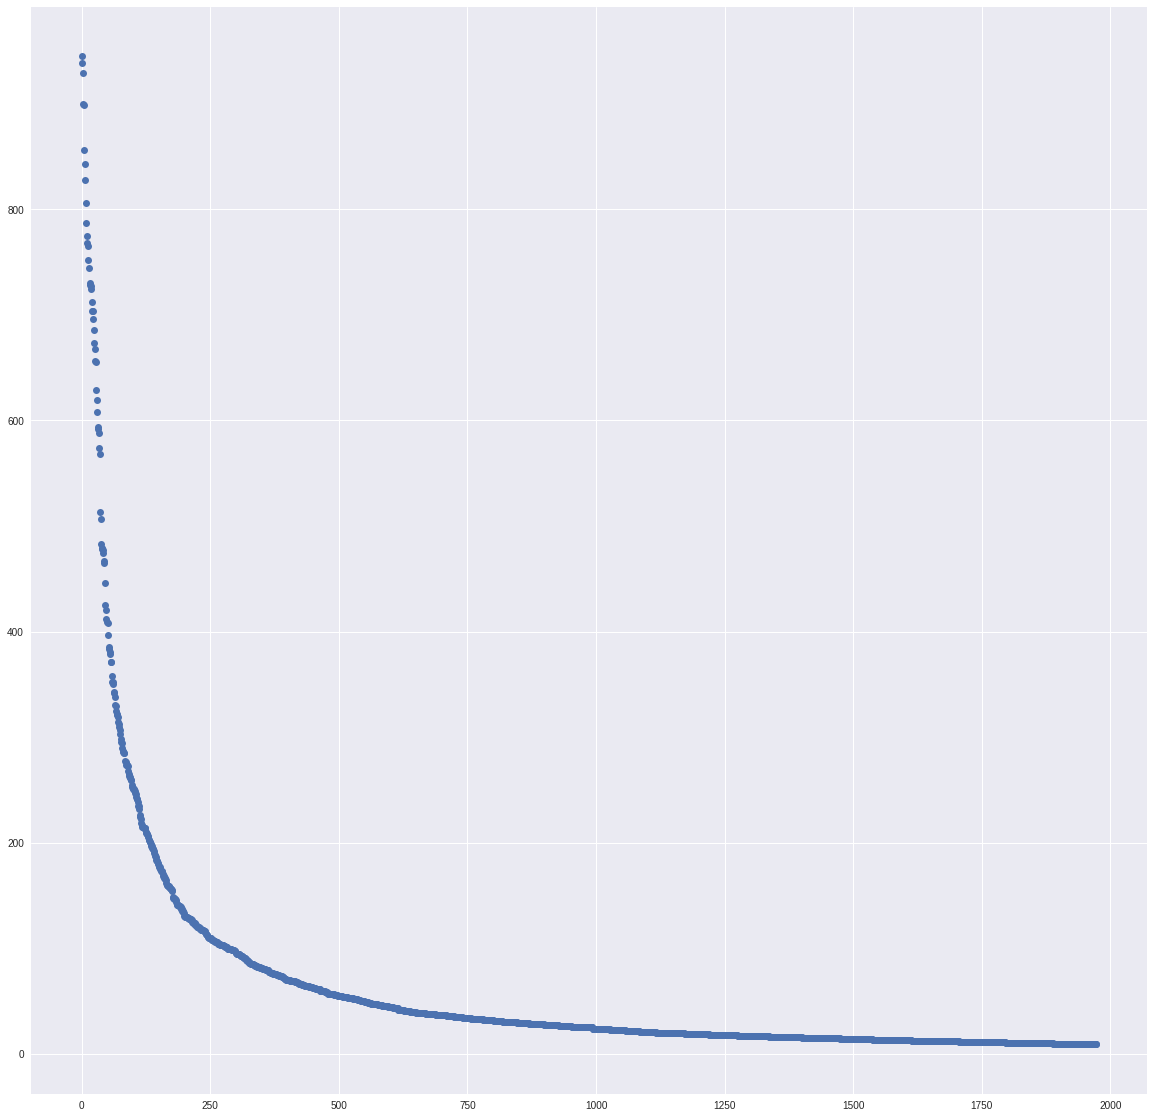

   0  00  1  10  100  11  12  14  15  17  ...   yelp  yes  yesterday  yet  \
0  0  0   0  0   0    0   0   0   0   0   ...   0     0    0          0     
1  0  0   0  0   0    0   0   0   0   0   ...   0     0    0          0     
2  0  0   0  0   0    0   0   0   0   0   ...   0     0    0          0     
3  0  0   1  0   0    0   0   0   0   0   ...   0     1    0          0     
4  0  0   0  0   0    0   0   0   0   0   ...   0     0    0          0     

   young  your  yourself  yum  yummy  zero  
0  0      0     0         0    0      0     
1  0      0     0         0    0      0     
2  0      0     0         0    0      0     
3  0      3     0         0    0      0     
4  0      0     0         0    0      0     

[5 rows x 1974 columns]


In [78]:
# Graph with stopwords removed based on max_df = index of 'here'
max_df = 600
min_df = 9
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_df=max_df, min_df=min_df)
X = vectorizer.fit(df.text)
# Words removed as stop words
print("horrible" in X.stop_words_)
print("customer" in X.stop_words_)
print("service" in X.stop_words_)
print(len(X.stop_words_))
stop_words = X.stop_words_
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=stop_words)
X = vectorizer.fit(df.text)
words = X.transform(df.text)
wordsdf = pd.DataFrame(words.todense(), columns=X.get_feature_names())
wordseries2 = wordsdf.sum(axis=0)
wordseries2.sort_values(ascending=False, inplace=True)
print(len(wordseries2))
fig = plt.figure(figsize=(20, 20))
p1 = plt.plot(range(0, len(wordseries2)), wordseries2, linestyle="", marker="o")
plt.show()
print(wordsdf.head())

In [81]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='cosine')
knn.fit(wordsdf, df.stars)
search = X.transform(["horrible customer service"])
searchdf = pd.DataFrame(search.todense(), columns=X.get_feature_names())
predicted = knn.predict(searchdf)
print(predicted)
distances, indexes = knn.kneighbors(searchdf)
pd.set_option('display.max_colwidth', -1)
for i in indexes:
  print(df.iloc[i]['text'])

[1]
1808    Rogers ...\n\n1) is over priced\n2) have horrible customer service\n3) faulty and incorrect billing\n4) poor customer service\n5) not enough options\n6) never arrive for an appointment                                                                                                                                                                                                                                              
90      Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  He will not repair the issue he caused, and told me to go somewhere else.  \n\nSave yourself the hassle, there are plenty of other quality pool companies out there.  \n\nTake care!
729     Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["stars"], test_size=0.1, random_state=5)
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_df=max_df, min_df=min_df, stop_words=stop_words)
X = vectorizer.fit(X_train)
bow_train = X.transform(X_train)
bow_train_df = pd.DataFrame(bow_train.todense(), columns=X.get_feature_names())
lr = LogisticRegression(solver='lbfgs')
lr.fit(bow_train_df, y_train)
bow_test = X.transform(X_test)
bow_test_df = pd.DataFrame(bow_test.todense(), columns=X.get_feature_names())

train_predictions = lr.predict(bow_train_df)
train_prob = lr.predict_proba(bow_train_df)
train_accuracy = lr.score(bow_train_df, y_train)
print("train accuracy:", train_accuracy)

predictions = lr.predict(bow_test_df)
probabilities = lr.predict_proba(bow_test_df)
test_accuracy = lr.score(bow_test_df, y_test)
print("test accuracy:", test_accuracy)


train accuracy: 0.9977777777777778
test accuracy: 0.93


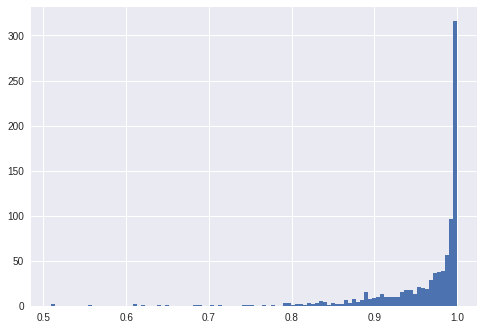

In [73]:
#neg = [prob[1] for prob in train_prob[train_predictions == 1]]
pos = [prob[1] for prob in train_prob[train_predictions == 5]]
plt.hist(pos, bins=100)
#plt.hist(neg, bins=100)
plt.show()

In [0]:
# New threshold

# training
train_prob = lr.predict_proba(bow_train_df)
predictions = [5 if prob[1] > 0.61 else 1 for prob in train_prob]
correct = 0

df_y_train = pd.DataFrame(y_train, columns=['stars'])
for pred, val in zip(predictions, df_y_train['stars']):
    if pred == val:
        correct += 1
print('train accuracy is ', correct/len(predictions))

# test
test_prob = lr.predict_proba(bow_test_df)
test_predictions = [5 if prob[1] > 0.61 else 1 for prob in test_prob]
test_correct = 0

df_y_test = pd.DataFrame(y_test, columns=['stars'])
for pred, val in zip(test_predictions, df_y_test['stars']):
    if pred == val:
        test_correct += 1
print('test accuracy is ', test_correct/len(test_predictions))

train accuracy is  0.9983333333333333
test accuracy is  0.96


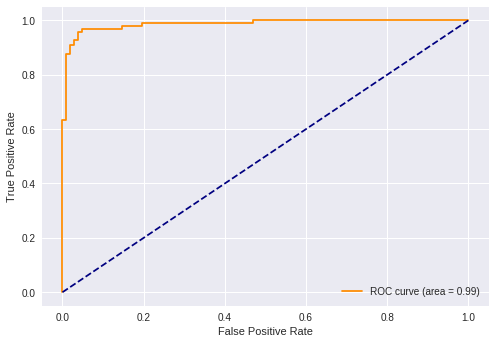

In [74]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
y_true = [0 if y == 1 else 1 for y in y_test.values]
scores = [proba[1] for proba in test_prob]
fpr, tpr, threshold = roc_curve(y_true, scores)
area_uc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % area_uc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [0]:
# Best Threshold

min_dist = 1000
result = (0,0,0)
for f,t,th in zip(fpr, tpr, threshold):
    dist = np.sqrt(np.square(f) + np.square(1-t))
    print("dist: ", dist)
    print(f,t,th)
    if dist < min_dist:
        result = (f, t, th)
        min_dist = dist

print('At the threshold: ', result[2], ', the best (FPR, TPR) is: (',result[0],', ',result[1],')')

dist:  1.0
0.0 0.0 1.9999993170400963
dist:  0.9897959183673469
0.0 0.01020408163265306 0.9999993170400961
dist:  0.36734693877551017
0.0 0.6326530612244898 0.9834527990616612
dist:  0.36747774123865273
0.00980392156862745 0.6326530612244898 0.9831376006960688
dist:  0.12284082986208557
0.00980392156862745 0.8775510204081632 0.8654888441169777
dist:  0.12400895175581983
0.0196078431372549 0.8775510204081632 0.862236408147984
dist:  0.09390662038285078
0.0196078431372549 0.9081632653061225 0.7867091063981658
dist:  0.09643151840735392
0.029411764705882353 0.9081632653061225 0.7439289286189067
dist:  0.07724695928928668
0.029411764705882353 0.9285714285714286 0.6897832302314614
dist:  0.08148564822290673
0.0392156862745098 0.9285714285714286 0.6660348292290365
dist:  0.05660249607070647
0.0392156862745098 0.9591836734693877 0.6158873634674278
dist:  0.06378788650322667
0.049019607843137254 0.9591836734693877 0.6157377571726139
dist:  0.05779300555246797
0.049019607843137254 0.96938775510